In [17]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [19]:
# Define file paths
zip_path = "archive (6).zip"  # Ensure this is the correct path
extract_folder = "credit_card_fraud_dataset"

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the datasets
train_data = pd.read_csv(os.path.join(extract_folder, 'fraudTrain.csv'))
test_data = pd.read_csv(os.path.join(extract_folder, 'fraudTest.csv'))


In [21]:
# Convert transaction date to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

# Extract time-based features
for df in [train_data, test_data]:
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    df['month'] = df['trans_date_trans_time'].dt.month

# Drop unnecessary columns
columns_to_drop = ['trans_date_trans_time', 'trans_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'cc_num']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

# Separate features and target
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [23]:
# Identify categorical and numerical columns
categorical_cols = ['merchant', 'category', 'gender', 'job']
numerical_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'hour', 'day_of_week', 'month']

# Preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


Logistic Regression:
Accuracy: 0.9108776198042536
Precision: 0.02551572201081514
Recall: 0.593939393939394
F1 Score: 0.048929428708593375
Confusion Matrix:
 [[504918  48656]
 [   871   1274]]


C:\Users\ludhi\AppData\Local\Temp\ipykernel_10004\1791891181.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data['is_fraud'], palette='coolwarm')


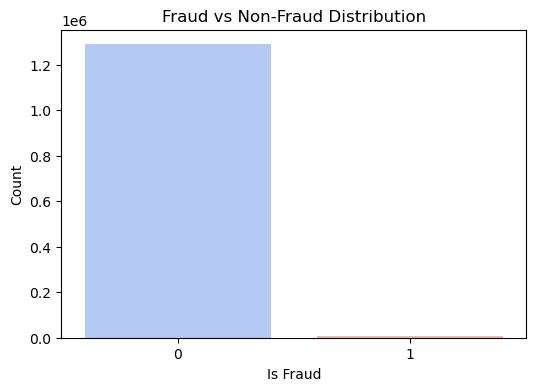

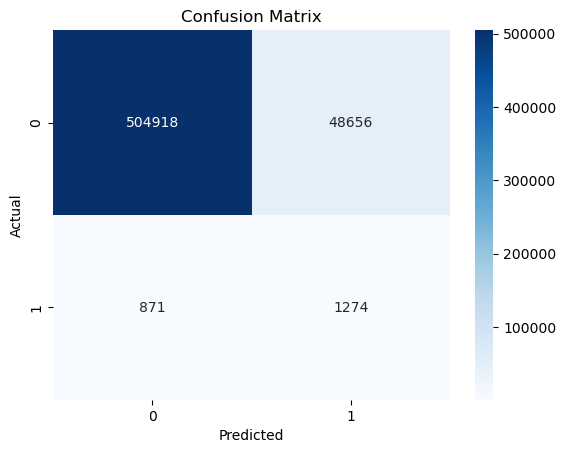

In [25]:
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Model Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=train_data['is_fraud'], palette='coolwarm')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Logistic Regression:
Accuracy: 0.9108776198042536
Precision: 0.02551572201081514
Recall: 0.593939393939394
F1 Score: 0.048929428708593375
Confusion Matrix:
 [[504918  48656]
 [   871   1274]]


C:\Users\ludhi\AppData\Local\Temp\ipykernel_8644\557574707.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data['is_fraud'], palette='coolwarm')


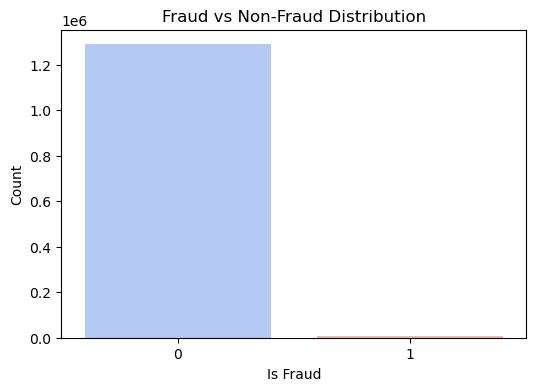

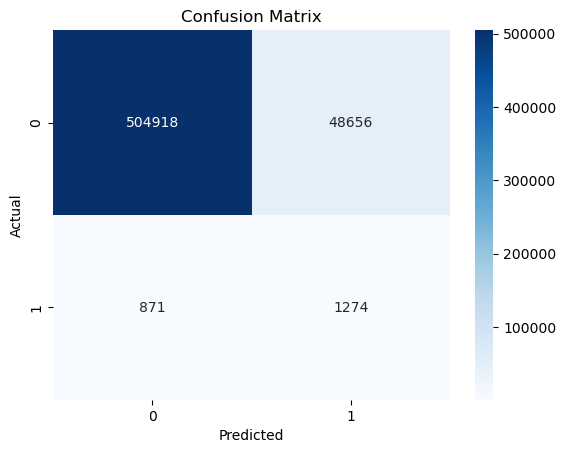

In [3]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Define file paths
zip_path = "archive (6).zip"  # Ensure this is the correct path
extract_folder = "credit_card_fraud_dataset"

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the datasets
train_data = pd.read_csv(os.path.join(extract_folder, 'fraudTrain.csv'))
test_data = pd.read_csv(os.path.join(extract_folder, 'fraudTest.csv'))
# Convert transaction date to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

# Extract time-based features
for df in [train_data, test_data]:
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    df['month'] = df['trans_date_trans_time'].dt.month

# Drop unnecessary columns
columns_to_drop = ['trans_date_trans_time', 'trans_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'cc_num']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

# Separate features and target
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']
# Identify categorical and numerical columns
categorical_cols = ['merchant', 'category', 'gender', 'job']
numerical_cols = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'hour', 'day_of_week', 'month']

# Preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Model Evaluation
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=train_data['is_fraud'], palette='coolwarm')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()